In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# define a constant to access files
import pathlib
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "drive" / "MyDrive" / "Colab Notebooks"

<Axes: >

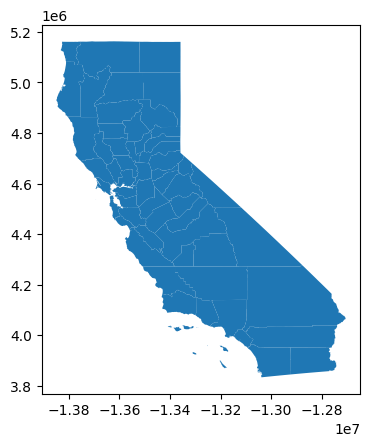

In [6]:
# read data from shp file to a GeoDataFrame:
import geopandas
cali_counties = geopandas.read_file(DATA_DIRECTORY / "California_Counties" / "California_Counties.shp")
cali_counties.plot()

In [7]:
cali_counties.head()

,OBJECTID,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,Shape__Are,Shape__Len,geometry
0,1,Alameda County,California,06,001,06001,3.084661e+09,448425.775672,"MULTIPOLYGON (((-13602253.477 4536144.556, -13..."
1,2,Alpine County,California,06,003,06003,3.156006e+09,275565.131463,"POLYGON ((-13347274.736 4711759.133, -13345788..."
2,3,Amador County,California,06,005,06005,2.562531e+09,359593.235353,"POLYGON ((-13366983.072 4680058.246, -13366989..."
3,4,Butte County,California,06,007,06007,7.340033e+09,525974.550843,"POLYGON ((-13514702.077 4887275.447, -13514730..."
4,5,Calaveras County,California,06,009,06009,4.356209e+09,367005.674344,"POLYGON ((-13366406.546 4651605.021, -13366413..."


In [8]:
cali_counties.columns

Index(['OBJECTID', 'NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS',
       'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')

In [9]:
# List shapely geometries that define each county
cali_counties.geometry.head()

0    MULTIPOLYGON (((-13602253.477 4536144.556, -13...
1    POLYGON ((-13347274.736 4711759.133, -13345788...
2    POLYGON ((-13366983.072 4680058.246, -13366989...
3    POLYGON ((-13514702.077 4887275.447, -13514730...
4    POLYGON ((-13366406.546 4651605.021, -13366413...
Name: geometry, dtype: geometry

In [10]:
LA_row = cali_counties.index[cali_counties['NAME'] == 'Los Angeles County'].tolist()
SD_row = cali_counties.index[cali_counties['NAME'] == 'San Diego County'].tolist()
SF_row = cali_counties.index[cali_counties['NAME'] == 'San Francisco County'].tolist()

In [11]:
LA_row

[18]

In [12]:
SD_row

[36]

In [13]:
SF_row

[37]

In [14]:
print(cali_counties.iloc[[18, 36, 37]])

    OBJECTID                  NAME  STATE_NAME STATE_FIPS CNTY_FIPS   FIPS  \
18        19    Los Angeles County  California         06       037  06037   
36        37      San Diego County  California         06       073  06073   
37        38  San Francisco County  California         06       075  06075   

      Shape__Are    Shape__Len  \
18  1.555122e+10  1.067791e+06   
36  1.565507e+10  7.976341e+05   
37  1.961650e+08  1.276710e+05   

                                             geometry  
18  MULTIPOLYGON (((-13201949.046 3900077.941, -13...  
36  MULTIPOLYGON (((-13048031.362 3865261.112, -13...  
37  MULTIPOLYGON (((-13693756.310 4537177.996, -13...  


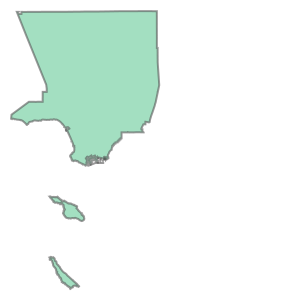

In [15]:
# LA county
cali_counties.at[18, "geometry"]

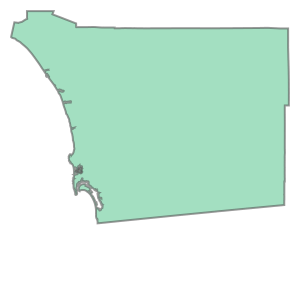

In [16]:
# SD county
cali_counties.at[36, "geometry"]

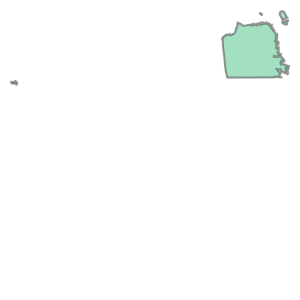

In [17]:
#SF county
cali_counties.at[37, "geometry"]

In [18]:
print(f"LA Area: {round(cali_counties.at[18, 'geometry'].area)} m².")

LA Area: 15551216960 m².


In [19]:
print(f"SD Area: {round(cali_counties.at[36, 'geometry'].area)} m².")

SD Area: 15655067196 m².


In [20]:
print(f"SF Area: {round(cali_counties.at[37, 'geometry'].area)} m².")

SF Area: 196164963 m².
